
Random Forest Cross-Validation Scores:
Individual CV Scores: [0.95098039 0.99019608 0.98039216 1.         0.98039216]
Mean CV Score: 0.980392156862745
Standard Deviation: 0.0164050985594917

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00        88
           2       1.00      1.00      1.00         6
           3       1.00      0.67      0.80         3

    accuracy                           0.99       102
   macro avg       0.96      0.92      0.93       102
weighted avg       0.99      0.99      0.99       102



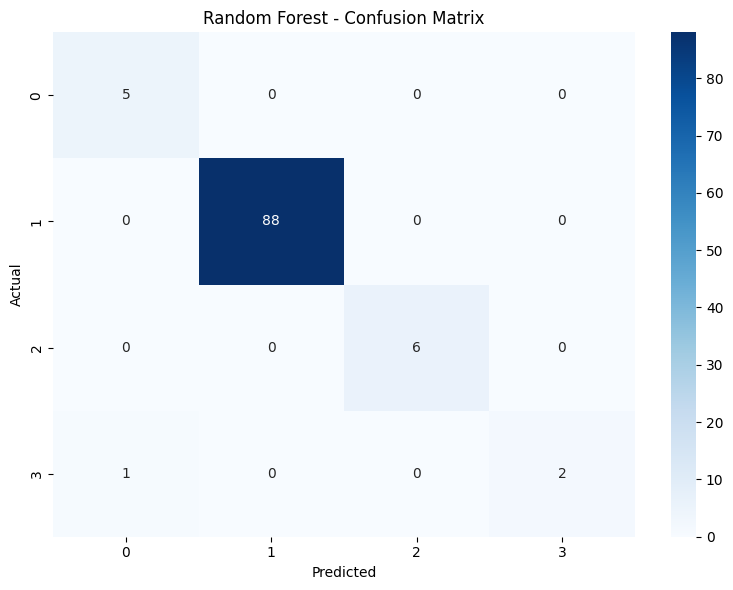

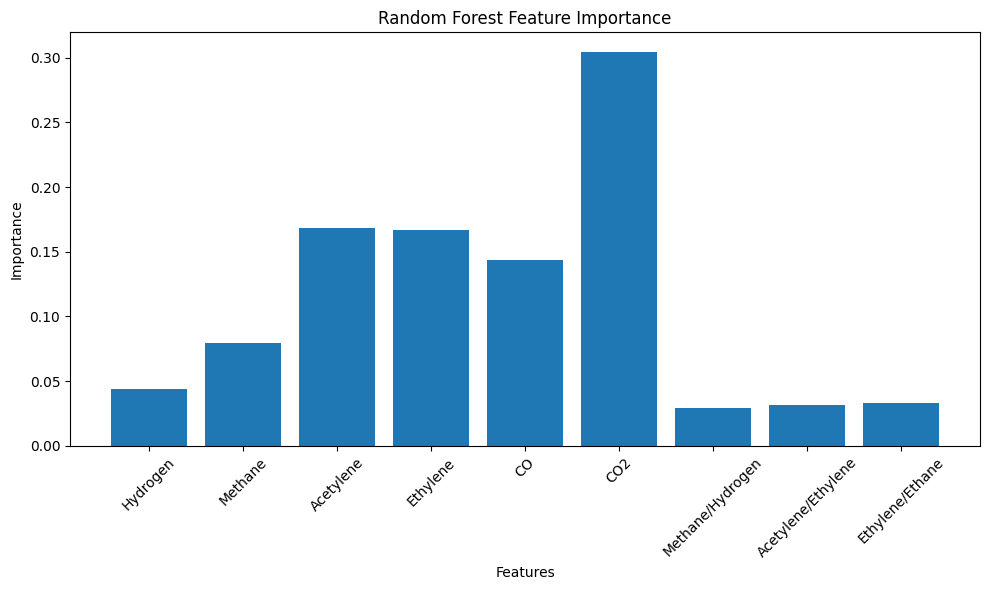


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.90      1.00      0.95        88
           2       0.00      0.00      0.00         6
           3       1.00      1.00      1.00         3

    accuracy                           0.90       102
   macro avg       0.72      0.55      0.57       102
weighted avg       0.85      0.90      0.86       102



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


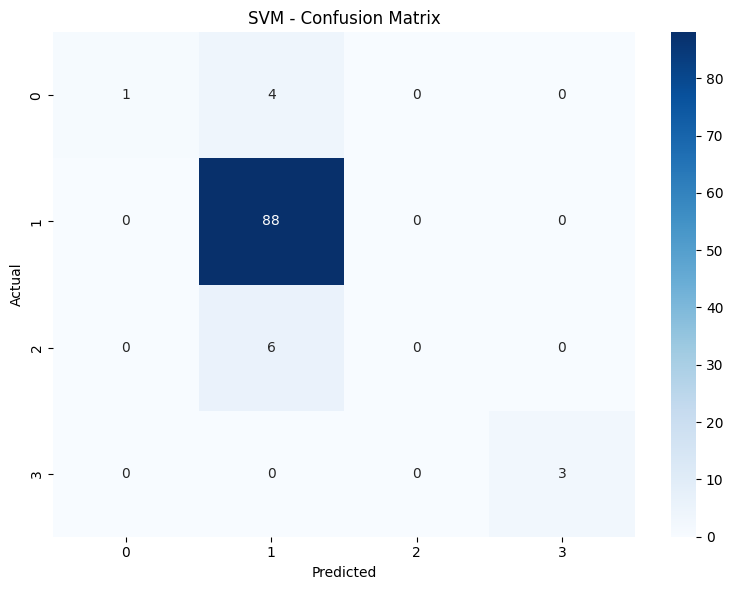

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.4760 - loss: 1.3177 - val_accuracy: 0.8902 - val_loss: 1.0206
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8111 - loss: 0.9928 - val_accuracy: 0.8902 - val_loss: 0.7053
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8410 - loss: 0.7117 - val_accuracy: 0.8902 - val_loss: 0.4892
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8482 - loss: 0.5551 - val_accuracy: 0.8902 - val_loss: 0.4252
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8593 - loss: 0.5111 - val_accuracy: 0.8902 - val_loss: 0.4178
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8434 - loss: 0.5421 - val_accuracy: 0.8902 - val_loss: 0.4113
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8562 - loss: 0.4714 - val_accuracy: 0.8902 - val_loss: 0.4004
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8758 - loss: 0.4556 - val_accuracy: 0.8902 - v

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.93      1.00      0.96        88
           2       0.00      0.00      0.00         6
           3       1.00      0.67      0.80         3

    accuracy                           0.92       102
   macro avg       0.68      0.62      0.64       102
weighted avg       0.87      0.92      0.89       102



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


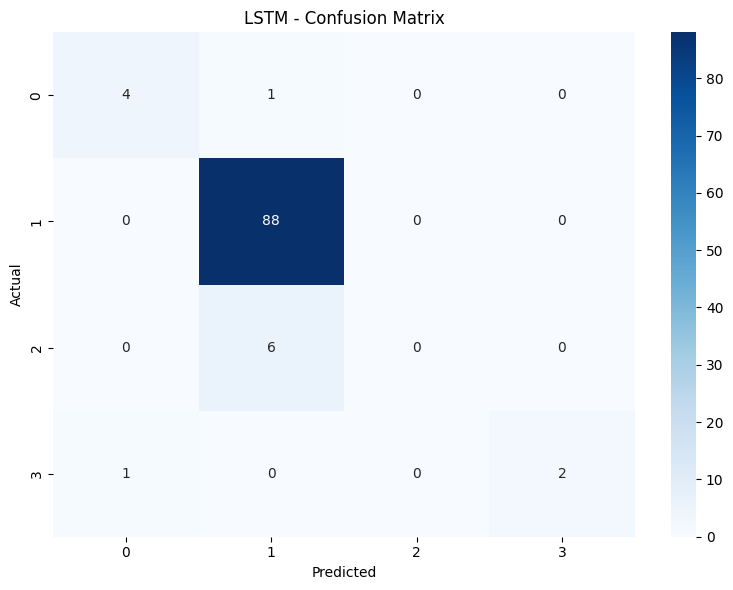

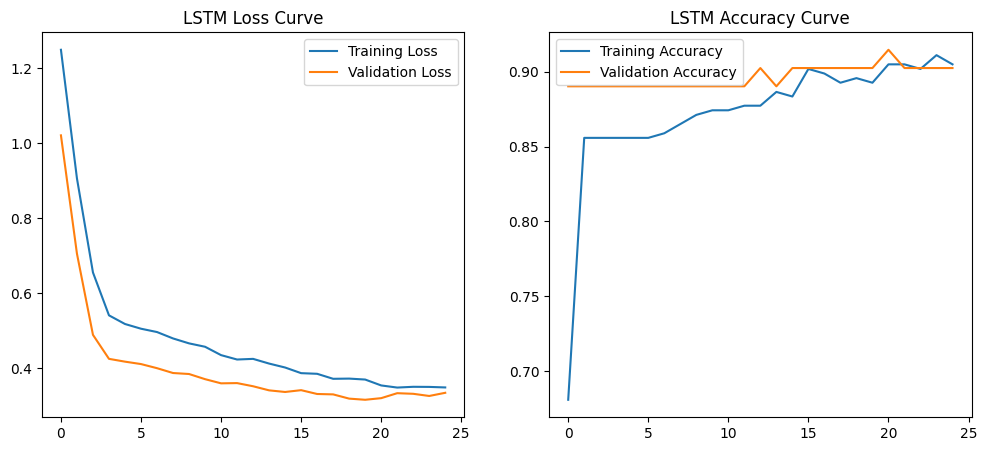

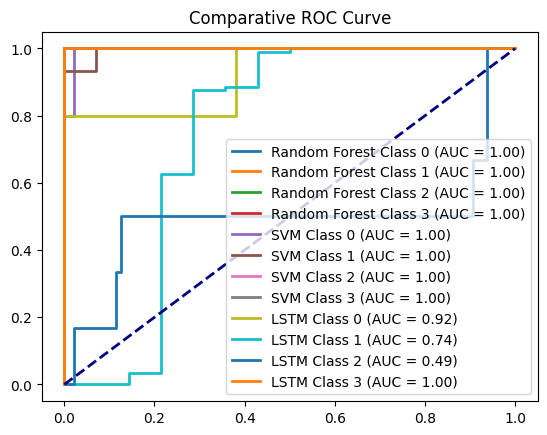

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import joblib

def preprocess_data(data):
    data.columns = data.columns.str.strip()
    column_mapping = {
        'H2': 'Hydrogen',
        'N2': 'Nitrogen',
        'CH4': 'Methane',
        'CO': 'CO',
        'CO2': 'CO2',
        'C2H4': 'Ethylene',
        'C2H6': 'Ethane',
        'C2H2': 'Acetylene'
    }
    data = data.rename(columns=column_mapping)
    for col in column_mapping.values():
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')
    return data

def engineer_features(data):
    data['Methane/Hydrogen'] = np.where(data['Hydrogen'] != 0, data['Methane'] / data['Hydrogen'], 0)
    data['Acetylene/Ethylene'] = np.where(data['Ethylene'] != 0, data['Acetylene'] / data['Ethylene'], 0)
    data['Ethylene/Ethane'] = np.where(data['Ethane'] != 0, data['Ethylene'] / data['Ethane'], 0)
    return data

def categorize_fault(row):
    if row['Hydrogen'] > 100 or row['Methane'] > 120:
        return 'Thermal Fault'
    elif row['Acetylene'] > 1 or row['Ethylene'] > 50:
        return 'Electrical Fault'
    elif row['CO'] > 350 or row['CO2'] > 2500:
        return 'Paper Degradation'
    else:
        return 'Normal'

def build_lstm_model(input_shape):
    model = keras.Sequential([
        layers.LSTM(64, input_shape=input_shape, return_sequences=True),
        layers.LSTM(32),
        layers.Dense(32, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

def plot_roc_curve_multiclass(y_test, y_probs, model_name, n_classes):
    y_test_bin = label_binarize(y_test, classes=range(n_classes))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2, label=f'{model_name} Class {i} (AUC = {roc_auc[i]:.2f})')

def plot_comparative_roc(y_test, rf_probs, svm_probs, lstm_probs, n_classes):
    plt.figure()
    plot_roc_curve_multiclass(y_test, rf_probs, "Random Forest", n_classes)
    plot_roc_curve_multiclass(y_test, svm_probs, "SVM", n_classes)
    plot_roc_curve_multiclass(y_test, lstm_probs, "LSTM", n_classes)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('Comparative ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

def plot_lstm_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('LSTM Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('LSTM Accuracy Curve')
    plt.legend()
    plt.show()

def plot_feature_importance(rf_model, feature_names):
    feature_importance = rf_model.feature_importances_
    plt.figure(figsize=(10, 6))
    plt.bar(feature_names, feature_importance)
    plt.title('Random Forest Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    # Load and preprocess data
    data = pd.read_csv('/content/transformer_main.csv')
    data = preprocess_data(data)
    data = engineer_features(data)
    data['Fault_Category'] = data.apply(categorize_fault, axis=1)

    # Prepare features and target
    features = ['Hydrogen', 'Methane', 'Acetylene', 'Ethylene', 'CO', 'CO2', 'Methane/Hydrogen', 'Acetylene/Ethylene', 'Ethylene/Ethane']
    X = data[features].fillna(0)
    y = data['Fault_Category'].astype('category').cat.codes
    n_classes = len(data['Fault_Category'].unique())

    # Stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # Random Forest with Hyperparameter Tuning
    rf_model = RandomForestClassifier(random_state=42)
    param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
    grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5)
    grid_search_rf.fit(X_train, y_train)
    rf_model = grid_search_rf.best_estimator_
    rf_preds = rf_model.predict(X_test)
    rf_probs = rf_model.predict_proba(X_test)

    # Cross-validation scores
    cv_scores = cross_val_score(rf_model, X, y, cv=5)
    print("\nRandom Forest Cross-Validation Scores:")
    print("Individual CV Scores:", cv_scores)
    print("Mean CV Score:", cv_scores.mean())
    print("Standard Deviation:", cv_scores.std())

    print("\nRandom Forest Classification Report:")
    print(classification_report(y_test, rf_preds))
    plot_confusion_matrix(y_test, rf_preds, "Random Forest")

    # Feature Importance Visualization
    plot_feature_importance(rf_model, features)

    # SVM with Hyperparameter Tuning
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    svm_model = OneVsRestClassifier(SVC(probability=True))
    svm_model.fit(X_train_scaled, y_train)
    svm_probs = svm_model.predict_proba(X_test_scaled)
    svm_preds = svm_model.predict(X_test_scaled)

    print("\nSVM Classification Report:")
    print(classification_report(y_test, svm_preds))
    plot_confusion_matrix(y_test, svm_preds, "SVM")

    # LSTM Model with EarlyStopping
    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)
    X_train_lstm = np.expand_dims(X_train.values, axis=1)
    X_test_lstm = np.expand_dims(X_test.values, axis=1)
    lstm_model = build_lstm_model((1, X_train.shape[1]))
    history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
    lstm_model.save('lstm_model.h5')
    lstm_probs = lstm_model.predict(X_test_lstm)
    lstm_preds = np.argmax(lstm_probs, axis=1)

    print("\nLSTM Classification Report:")
    print(classification_report(y_test, lstm_preds))
    plot_confusion_matrix(y_test, lstm_preds, "LSTM")
    plot_lstm_history(history)

    # Comparative ROC Curve
    plot_comparative_roc(y_test, rf_probs, svm_probs, lstm_probs, n_classes)

if __name__ == "__main__":
    main()

In [ ]:
!pip install joblib